# Preparación Data Final para Modelar

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sys
import matplotlib
sns.set_style('darkgrid')
plt.style.use('ggplot')


# Manejo de fechas
import datetime
import matplotlib.dates as mdates
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn import metrics

pd.set_option('display.max_columns', None)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#from sklearn.externals import joblib
from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

## Datos

In [2]:
#test

In [3]:
df1= pd.read_csv('../sintetic_ds.csv', sep=",")
df2= pd.read_csv('../sintetic_ds2.csv', sep=",")
df3= pd.read_csv('../sintetic_ds_test_new.csv', sep=",")

df = pd.concat([df1,df2] , ignore_index=True)

#df= pd.read_csv('./sintetic_ds.csv', sep=";", header=None, names=header_list)
df.head()

,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,crop,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,Unnamed: 25,N,P,K,No,Po,Ko,leaf_att,stem_att,store_att,SeasonLength,leaf_lim,stem_lim,store_lim,N_supply,P_supply,K_supply,N_uptake,P_uptake,K_uptake,N_gap,P_gap,K_gap
0,4.7,21,30,1.5,1.1,63.8,1.7,21.2,0.7,0.17,0.7,3810,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,6779.22444,230,130,130,0,0,0,3264.08034,3515.1441,3713.394876,240,3264.1,3515.1,3152.1,212.1,22.5,105.8,195.8,22.0,97.8,159.3,10.7,0.0
1,5.7,21,20,1.7,1.1,67.5,5.3,29.2,0.7,0.17,0.7,5210,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,9270.27804,200,50,310,0,0,0,4463.47994,4806.7981,4262.349226,240,4463.5,4806.8,2881.2,207.1,13.8,245.8,175.7,13.7,138.4,331.8,112.6,0.0
2,5.1,21,21,1.5,1.1,55.1,3.7,28.0,0.7,0.17,0.7,3090,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,5498.11116,550,80,310,0,0,0,2647.24626,2850.8649,3386.065776,240,2647.2,2850.9,3185.0,375.9,14.8,209.2,265.1,14.8,139.2,0.0,29.6,0.0
3,5.9,21,25,0.3,1.1,90.6,6.8,3.9,0.7,0.17,0.7,4050,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,7206.26220,460,130,80,0,0,0,3469.69170,3736.5705,3815.710656,240,3469.7,3736.6,3285.6,397.7,27.9,57.7,292.9,25.2,57.0,0.0,0.0,0.0
4,5.3,21,10,1.1,1.1,28.8,2.4,41.4,0.7,0.17,0.7,6300,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,11209.74120,280,40,50,0,0,0,5397.29820,5812.4430,4609.717375,240,5397.3,5812.4,1784.7,209.6,8.6,71.2,150.7,8.6,58.9,456.6,182.7,0.0


In [4]:
TO_KEEP=['PH', 'SOC', 'KEX', 'PBRAY', 'NrTrees', 'N', 'P', 'K', 'leaf_att', 'stem_att', 'store_att','Unnamed: 25','N_supply']
df = df[TO_KEEP]
df
df3 = df3[TO_KEEP]


In [5]:
df.count()

PH             15000
SOC            15000
KEX            15000
PBRAY          15000
NrTrees        15000
N              15000
P              15000
K              15000
leaf_att       15000
stem_att       15000
store_att      15000
Unnamed: 25    15000
N_supply       15000
dtype: int64

## Escogiendo columnas relevantes

In [6]:
df.value_counts()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PH           15000 non-null  float64
 1   SOC          15000 non-null  int64  
 2   KEX          15000 non-null  float64
 3   PBRAY        15000 non-null  float64
 4   NrTrees      15000 non-null  int64  
 5   N            15000 non-null  int64  
 6   P            15000 non-null  int64  
 7   K            15000 non-null  int64  
 8   leaf_att     15000 non-null  float64
 9   stem_att     15000 non-null  float64
 10  store_att    15000 non-null  float64
 11  Unnamed: 25  15000 non-null  float64
 12  N_supply     15000 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 1.5 MB


In [7]:
y = df['N_supply']
#x= df
X = df.drop('N_supply', axis=1)
X.info()


ytest_new_dataset=df3['N_supply']
Xtest_new_dataset=df3.drop('N_supply', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 0)



X_test = Xtest_new_dataset

y_test = ytest_new_dataset


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PH           15000 non-null  float64
 1   SOC          15000 non-null  int64  
 2   KEX          15000 non-null  float64
 3   PBRAY        15000 non-null  float64
 4   NrTrees      15000 non-null  int64  
 5   N            15000 non-null  int64  
 6   P            15000 non-null  int64  
 7   K            15000 non-null  int64  
 8   leaf_att     15000 non-null  float64
 9   stem_att     15000 non-null  float64
 10  store_att    15000 non-null  float64
 11  Unnamed: 25  15000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.4 MB


## RandomForestRegressor

In [8]:
print("\n")
print('\033[1m' + "N_supply Random Forest")
print('\033[0m')

#X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.get_params()

#
#print("Puntaje Random Forest Regressor: " + str(regr.oob_score_))
pred =  regr.predict(X_test)
gt = y_test


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))





N_supply Random Forest

Mean Absolute Error (MAE): 41.755615317290264
Mean Squared Error (MSE): 2705.463206716529
Root Mean Squared Error (RMSE): 52.014067392548036
Mean Absolute Percentage Error (MAPE): 15.0
Accuracy: 85.0
R^2: 0.7663497383775084


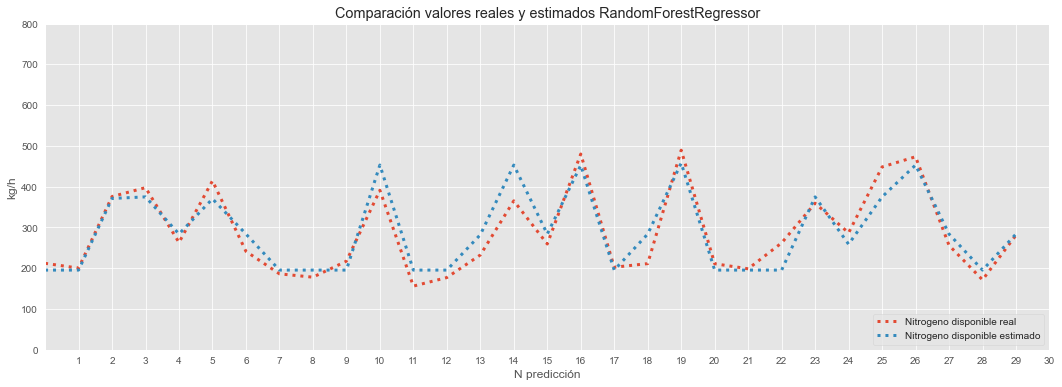

In [9]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados RandomForestRegressor')
plt.legend(loc='lower right')
plt.show()



In [10]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

## Multi-layer Perceptron (MLP)

In [11]:

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
pred = regr.predict(X_test)



print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)




Mean Absolute Error (MAE): 8.037438548625872
Mean Squared Error (MSE): 99.605945106346
Root Mean Squared Error (RMSE): 9.980277807072607
Mean Absolute Percentage Error (MAPE): 2.78
Accuracy: 97.22
R^2: 0.9913977927788941


0.9913977927788941

In [12]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

In [13]:
X_test.head()


,PH,SOC,KEX,PBRAY,NrTrees,N,P,K,leaf_att,stem_att,store_att,Unnamed: 25
0,4.7,30,1.5,0.3,3810,230,130,130,3264.08034,3515.1441,3713.394876,6779.22444
1,5.7,20,1.7,0.3,4870,190,110,180,4172.19718,4493.1107,4139.659036,8665.30788
2,5.1,21,1.5,0.3,3090,550,80,310,2647.24626,2850.8649,3386.065776,5498.11116
3,5.9,25,0.3,0.3,4050,460,130,80,3469.69170,3736.5705,3815.710656,7206.26220
4,5.3,10,1.1,0.3,2960,410,130,50,2535.87344,2730.9256,3323.706320,5266.79904


In [14]:
y_test.head()

0    212.1
1    200.4
2    375.9
3    397.7
4    263.2
Name: N_supply, dtype: float64

In [15]:
#print(regr.predict([[5.1, 21, 1.5, 1.1, 3090, 550, 80, 310, 3386.065776]]))

In [16]:
#print(regr.predict([[5.5, 13, 0.9, 1.1, 4950, 410, 120, 180, 4169.140656]]))

In [17]:
X_test[0:1]

,PH,SOC,KEX,PBRAY,NrTrees,N,P,K,leaf_att,stem_att,store_att,Unnamed: 25
0,4.7,30,1.5,0.3,3810,230,130,130,3264.08034,3515.1441,3713.394876,6779.22444


In [18]:
display(X_test.iloc[0])

PH                4.700000
SOC              30.000000
KEX               1.500000
PBRAY             0.300000
NrTrees        3810.000000
N               230.000000
P               130.000000
K               130.000000
leaf_att       3264.080340
stem_att       3515.144100
store_att      3713.394876
Unnamed: 25    6779.224440
Name: 0, dtype: float64

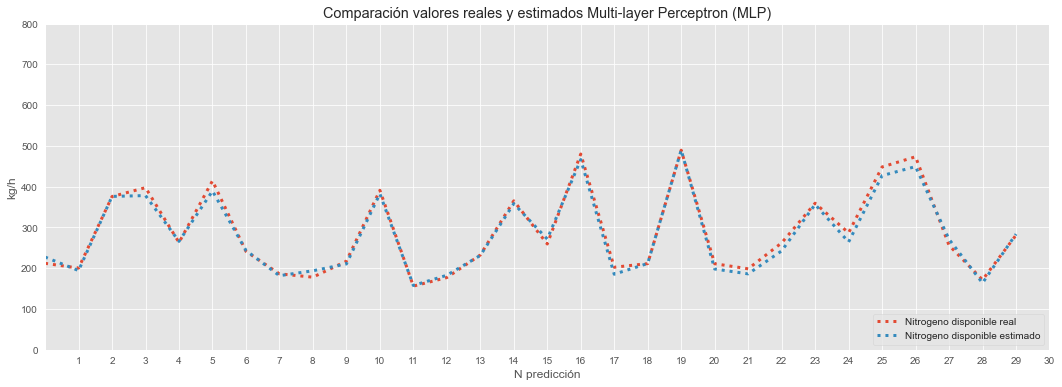

In [19]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados Multi-layer Perceptron (MLP)')
plt.legend(loc='lower right')
plt.show()




##  BaggingRegressor

In [20]:
regr = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0).fit(X_train, y_train)

In [21]:


pred = regr.predict(X_test)


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)



Mean Absolute Error (MAE): 81.16565063980765
Mean Squared Error (MSE): 9206.839141100612
Root Mean Squared Error (RMSE): 95.95227533050279
Mean Absolute Percentage Error (MAPE): 30.35
Accuracy: 69.65
R^2: 0.2048753911367649


0.2048753911367649

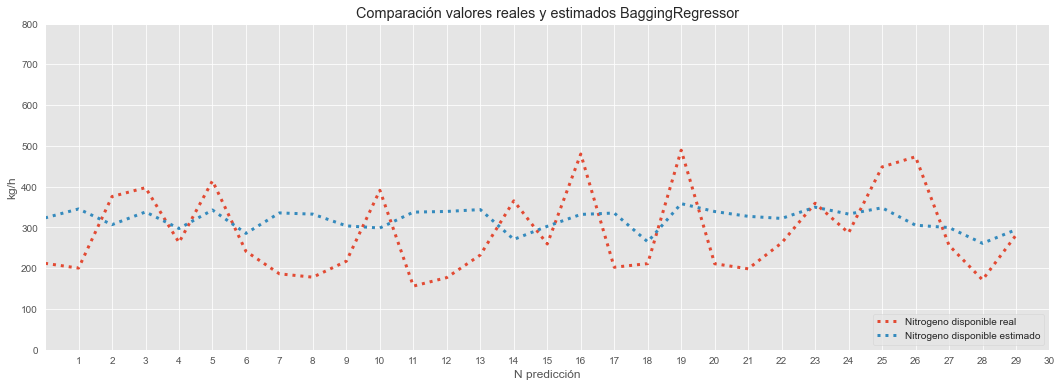

In [22]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados BaggingRegressor')
plt.legend(loc='lower right')
plt.show()



## DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(random_state=0)
regr = regressor.fit(X_train, y_train)

pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)

#cross_val_score(regressor, X_train, y_train, cv=20)

Mean Absolute Error (MAE): 6.469066666666666
Mean Squared Error (MSE): 91.39611999999998
Root Mean Squared Error (RMSE): 9.560131798254666
Mean Absolute Percentage Error (MAPE): 2.28
Accuracy: 97.72
R^2: 0.9921068128754197


0.9921068128754197

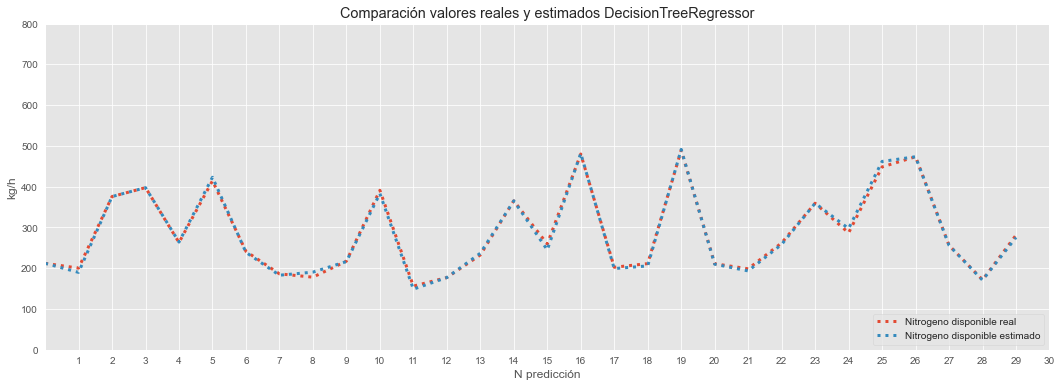

In [24]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados DecisionTreeRegressor')
plt.legend(loc='lower right')
plt.show()




## SVR


In [25]:
regr = SVR(C=100, epsilon=0.2)
regr.fit(X_train, y_train)

SVR(C=100, epsilon=0.2)

In [26]:
pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)


Mean Absolute Error (MAE): 17.254481755747804
Mean Squared Error (MSE): 448.7455837101428
Root Mean Squared Error (RMSE): 21.183615926232772
Mean Absolute Percentage Error (MAPE): 6.06
Accuracy: 93.94
R^2: 0.9612452600443742


0.9612452600443742

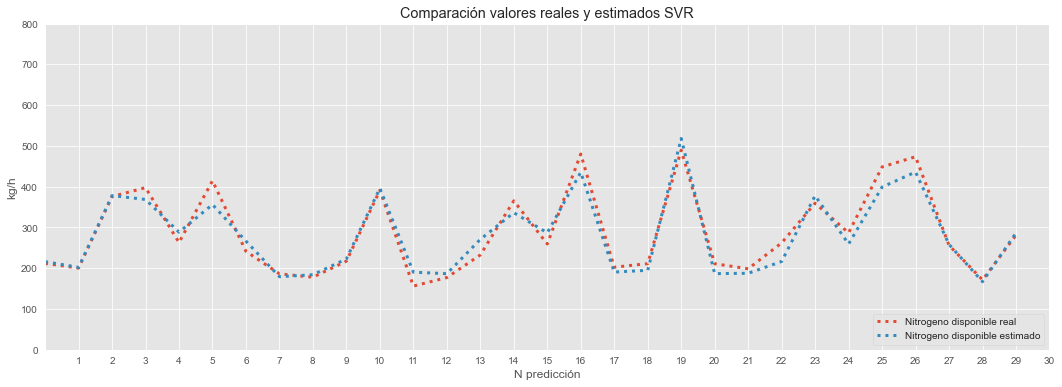

In [27]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados SVR')
plt.legend(loc='lower right')
plt.show()
